#Homework Stage 4 Unsupervised Learning
Kelompok 1: 
- Fildzah Zhafarina 
- Nabilah Nurul Fikri 
- Wahyuni 
- Sakti Hakim Nasution 
- Ryan Hardi 
- Alifian Darmawan 
- Tiurmauli Rahel Ernita

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/Kelompok 1/Stage 4/Homework/Dataset/flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
20436,32495,6/7/2011,6/8/2011,Male,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,578.0,19547,10/31/2013,153,57.111111,289,0,0.612711,13070,3
39942,33723,7/24/2012,7/29/2012,Male,5,qidong,jiangsu,CN,45.0,3/31/2014,...,2814.0,7973,1/11/2014,81,106.200000,402,0,0.585056,3072,0
29738,50042,1/15/2011,1/15/2011,Male,4,NaN,NaN,HK,63.0,3/31/2014,...,4830.0,10257,9/25/2013,189,40.583333,161,0,0.738462,4526,1
3692,2682,9/16/2007,9/17/2007,Female,4,SYDNEY,NSW,AU,39.0,3/31/2014,...,11152.0,60296,11/8/2013,145,31.722222,170,2,0.661355,25372,2
46219,43200,11/8/2012,11/8/2012,Male,4,beijing,beijing,CN,45.0,3/31/2014,...,635.0,3880,8/20/2013,225,71.250000,269,0,0.876881,3671,0


## Soal 1 EDA

### Descriptive Statistics

In [ ]:
#Memisahkan kolom numerik, numerik date, dan kategorik
nums = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
        'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
        'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

nums_date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

In [ ]:
#informasi general dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
#cek missing value setiap kolom
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

1. Terdapat missing value di beberapa kolom seperti Gender, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2
2. Tipe data sudah sesuai

### Handling Missing Value

In [ ]:
#melihat presentase missing value pada data 
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_value['% Missing Values'] = df.isna().sum() / len(df)*100
missing_value = missing_value[missing_value['% Missing Values'] > 0]
missing_value

,Missing Values,% Missing Values
GENDER,3,0.004763
WORK_CITY,2269,3.602273
WORK_PROVINCE,3248,5.156538
WORK_COUNTRY,26,0.041278
AGE,420,0.666794
SUM_YR_1,551,0.874770
SUM_YR_2,138,0.219089


In [ ]:
# Drop Missing value & Cek jumlah baris sebelum missing value didrop
print(df.shape)

df_drop=df.dropna()



(62988, 23)


In [ ]:
# Jumlah baris setelah missing value didrop
print(df_drop.shape)

(58255, 23)


In [ ]:
#cek kembali apakah masih ada missing value
df_drop.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
#cek duplicates data
df_drop.duplicated().sum()

0

In [ ]:
#Cek Statistika Summary Numerikal
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,58255.0,31545.754854,18187.496028,3.0,15787.500000,31603.000000,47315.500000,62988.0
FFP_TIER,58255.0,4.104849,0.378182,4.0,4.000000,4.000000,4.000000,6.0
AGE,58255.0,42.228736,9.761965,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,58255.0,12.067634,14.236472,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,58255.0,11066.303682,16283.209178,0.0,2608.000000,5832.000000,13022.000000,505308.0
SUM_YR_1,58255.0,5366.827963,8103.595049,0.0,1016.000000,2808.000000,6591.500000,239560.0
SUM_YR_2,58255.0,5694.530650,8710.724917,0.0,846.000000,2846.000000,6958.000000,234188.0
SEG_KM_SUM,58255.0,17353.000910,20969.886756,368.0,4904.000000,10237.000000,21571.500000,580717.0
LAST_TO_END,58255.0,171.255309,180.560120,1.0,28.000000,104.000000,258.000000,731.0
AVG_INTERVAL,58255.0,67.937285,77.449058,0.0,23.700000,44.833333,82.000000,728.0


In [ ]:
#Cek Statistika Summary Numerikal
df_drop[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,58255,58255,58255,58255
unique,2,2944,1127,105
top,Male,guangzhou,guangdong,CN
freq,44434,9283,17329,54954


1. Dari summary numericals, tidak terlihat ada data yang aneh. Namun ada beberapa kolom yang skew.
2. Dan dari summary categoricals pun tidak terlihat adanya keanehan data. Jumlah unik dari value pada kolom WORK_CITY,WORK_PROVINCE,WORK_COUNTRY sangat anyak

### Melihat Ketimpangan Data di Categoricals (Value Counting)

In [ ]:
for col in cats:
  print(f'''Value count kolom{col}:''')
  print(df[col].value_counts())
  print()

Value count kolomGENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolomWORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolomWORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolomWORK_COUNTRY:
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64



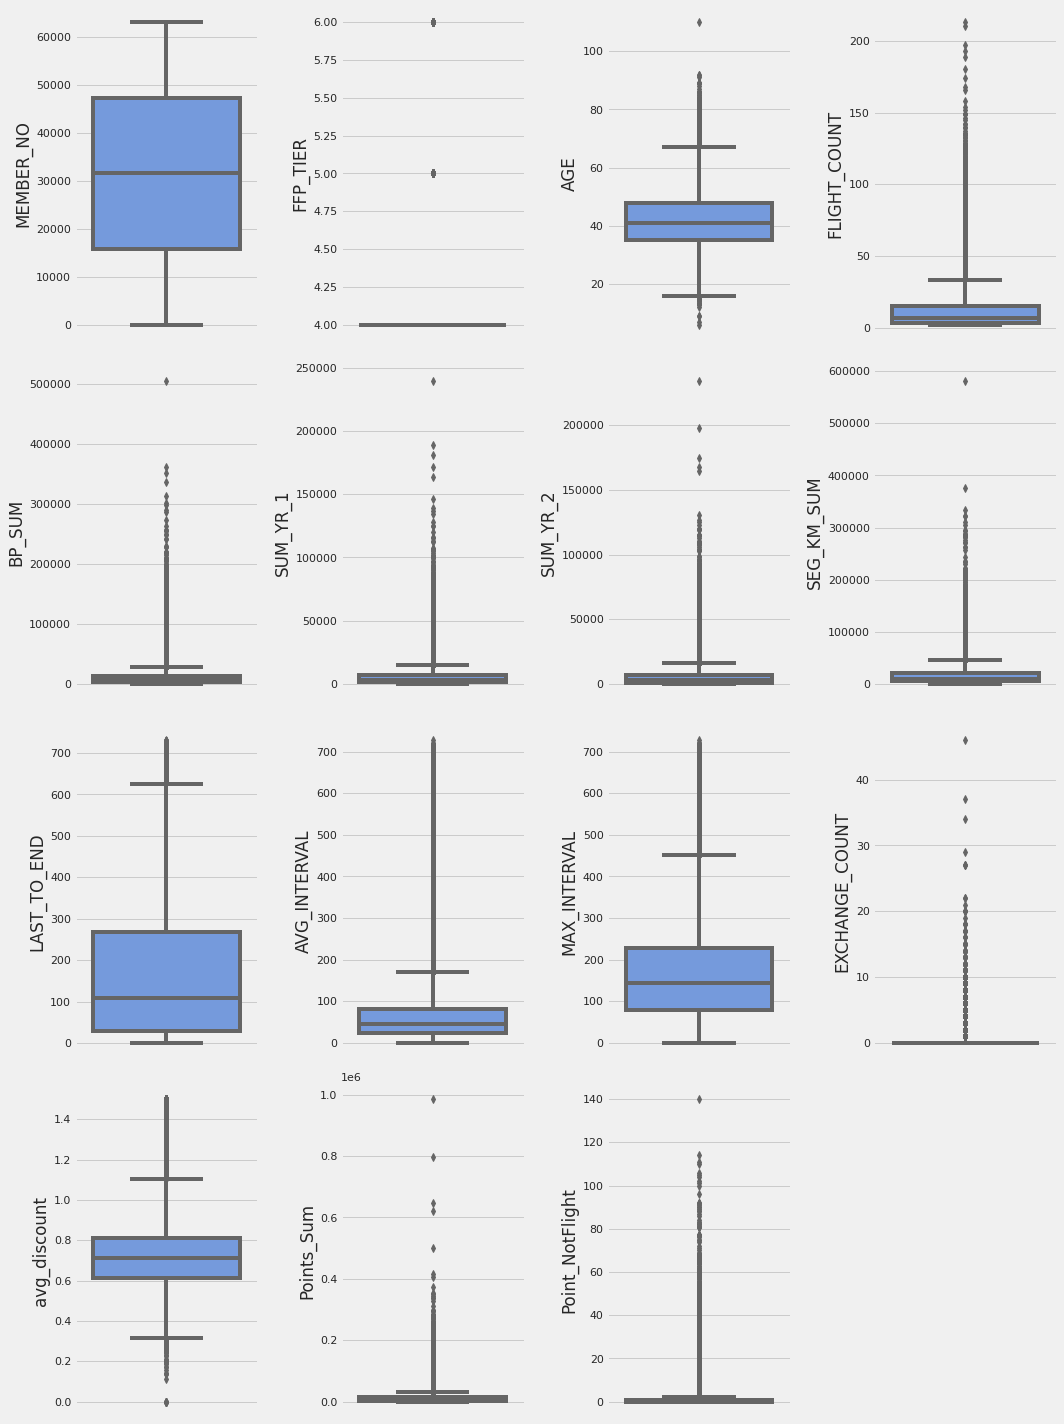

In [ ]:
features = nums
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

Pada visualisasi diatas, ada beberapa kolom memiliki outlier seperti FFP_TIER, AGE, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, EXCHANGE_COUNT, Point_Sum, dan Point_NotFLIGHT

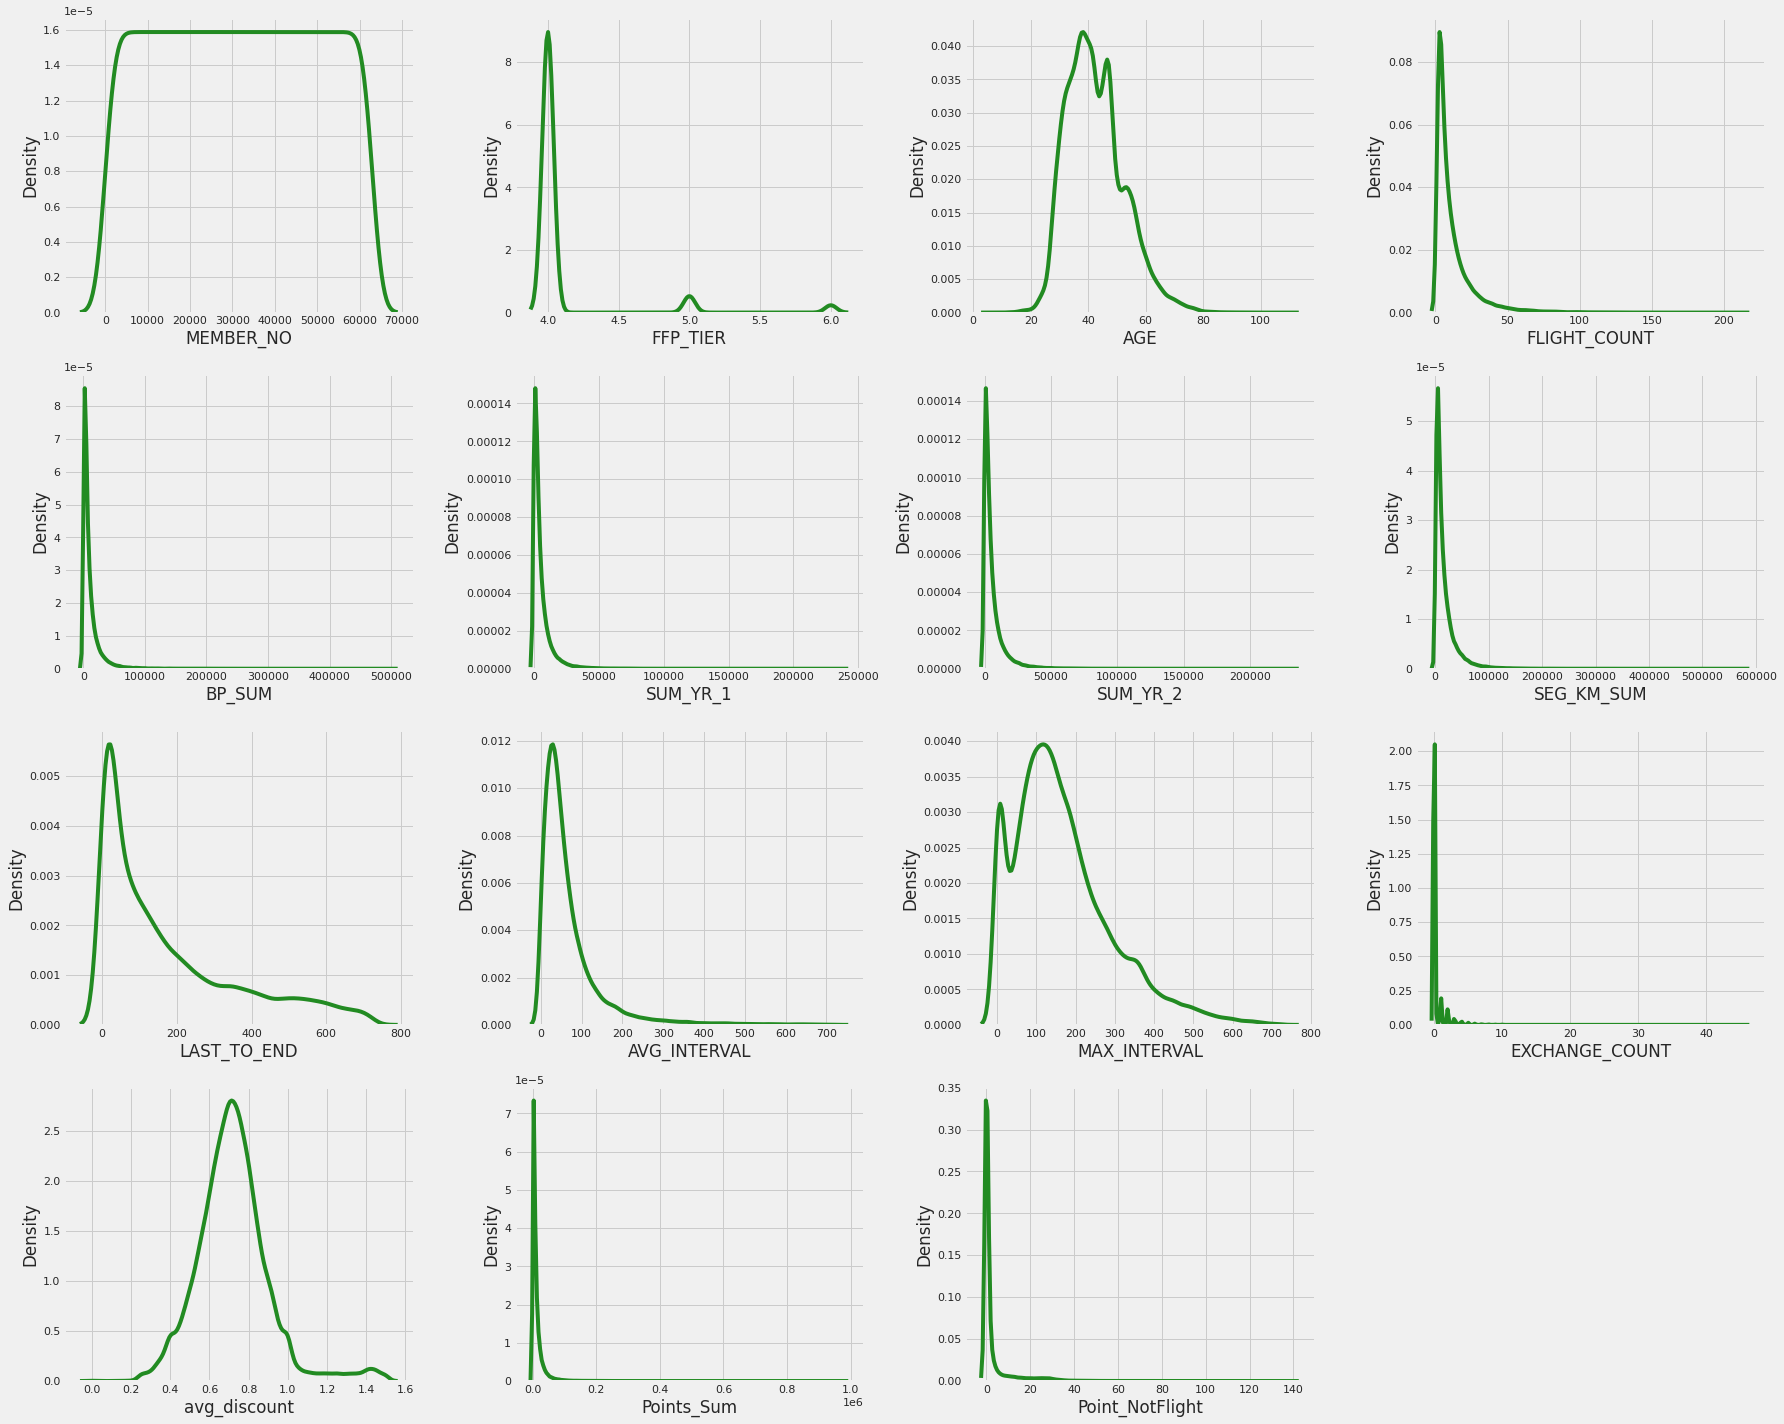

In [ ]:
features = nums
plt.figure(figsize=(25, 20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

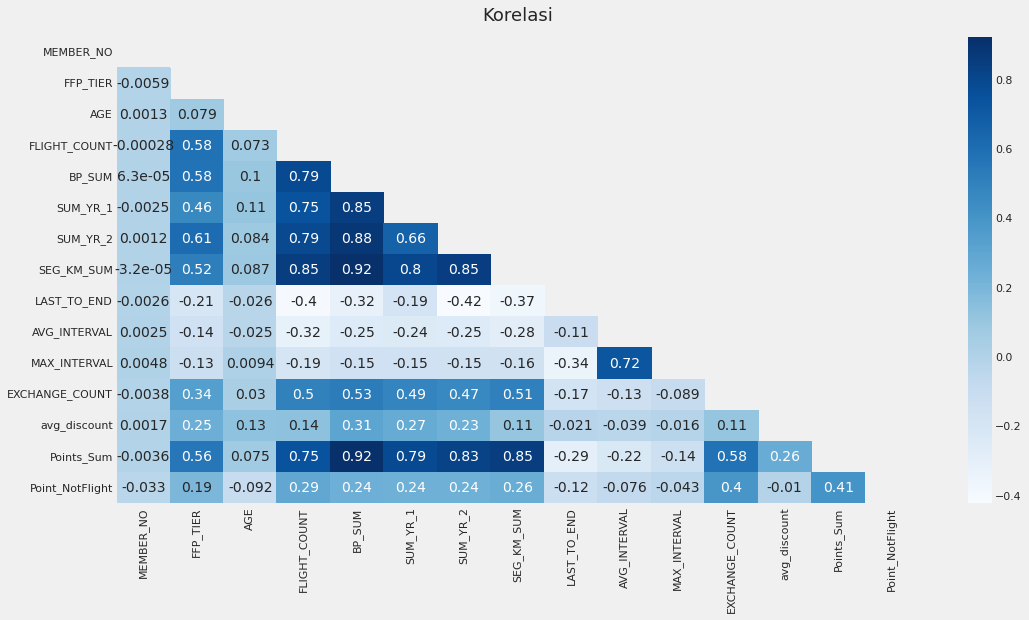

In [ ]:
# Correlation Analysis
plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Blues' )
heatmap.set_title('Korelasi', fontdict={'fontsize':18}, pad=16);

Beberapa kolom memiliki kolerasi yang sangat kuat, seperti SEG_KM_SUM dengan SUM_YR_1 dan SUM_YR_2. Selain itu SEG_KM_SUM dengan BP_SUM.

## Soal 2 Pre-processing

## Handling Outlier

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_drop)}')

filtered_entries = np.array([True] * len(df_drop))
feats = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','Points_Sum','Point_NotFlight']
for col in feats:
    zscore = abs(stats.zscore(df_drop[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_drop = df_drop[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_drop)}')

Jumlah baris sebelum memfilter outlier: 58255
Jumlah baris setelah memfilter outlier: 53219


## Feature Engineering

Pada bagian ini, kelompok kami memilih feature engineering Average Tarif Per KM, Lama Membership, dan average Discount. Hal tersebut dikarenakan kami ingin membandingkan apakah lama nya membership akan mempengaruhi pembelian flight pada customer (Average_Tarif_PerKM) dan pengaruh discount pada membership customers

In [ ]:
#Membuat kolom Average_Tarif_PerKM 
df_drop['Average_Tarif_PerKM']=(df_drop['SUM_YR_1']+df_drop['SUM_YR_2'])/df_drop['SEG_KM_SUM']
df_drop['Average_Tarif_PerKM']

1028     0.599615
1104     0.670061
1216     0.546624
1256     1.164029
1280     0.329531
           ...   
62981    0.000000
62982    0.000000
62983    0.000000
62985    0.000000
62986    0.000000
Name: Average_Tarif_PerKM, Length: 53219, dtype: float64

In [ ]:
# Membuat kolom Lama_Membership
df_drop['FFP_DATE'] = df_drop['FFP_DATE'].astype('datetime64[ns]')
df_drop['LOAD_TIME'] = df_drop['LOAD_TIME'].astype('datetime64[ns]')

df_drop['Lama_Membership']=df_drop['LOAD_TIME']-df_drop['FFP_DATE']
df_drop['Lama_Membership']

1028    1319 days
1104    1740 days
1216    1132 days
1256    1216 days
1280    1045 days
           ...   
62981    850 days
62982    435 days
62983   1046 days
62985   2923 days
62986    418 days
Name: Lama_Membership, Length: 53219, dtype: timedelta64[ns]

### Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

for i in ['Average_Tarif_PerKM','Lama_Membership', 'avg_discount']:
    df_drop[i] = StandardScaler().fit_transform(df_drop[i].values.reshape(len(df_drop), 1))

df_drop.describe()


,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Average_Tarif_PerKM,Lama_Membership
count,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,5.321900e+04,53219.000000,53219.000000,5.321900e+04,5.321900e+04
mean,31630.583326,4.039121,41.879761,9.934441,8461.420395,4179.301885,4365.656119,14118.634905,179.398128,70.726385,171.129728,0.199853,8.544831e-18,9167.724140,1.597193,-8.117589e-17,-1.773052e-16
std,18162.759600,0.193886,9.398308,9.377336,8692.747819,4752.821814,5177.654886,13290.350876,182.310287,78.869440,124.237787,0.710465,1.000009e+00,9489.054261,4.334661,1.000009e+00,1.000009e+00
min,4.000000,4.000000,13.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,-4.057425e+00,0.000000,0.000000,-2.358032e+00,-1.281051e+00
25%,15865.500000,4.000000,35.000000,3.000000,2463.500000,924.000000,736.000000,4672.000000,33.000000,26.115385,85.000000,0.000000,-6.009733e-01,2673.000000,0.000000,-5.663818e-01,-8.727056e-01
50%,31754.000000,4.000000,41.000000,7.000000,5360.000000,2569.000000,2585.000000,9470.000000,113.000000,47.333333,148.000000,0.000000,-3.045578e-02,5810.000000,0.000000,-6.826165e-02,-2.764494e-01
75%,47410.000000,4.000000,48.000000,13.000000,11325.500000,5768.000000,6057.000000,18973.000000,273.000000,85.250000,234.000000,0.000000,5.131981e-01,12178.000000,1.000000,4.278006e-01,8.257210e-01
max,62988.000000,5.000000,71.000000,54.000000,59849.000000,29677.000000,31826.000000,80091.000000,731.000000,728.000000,728.000000,20.000000,4.488111e+00,73006.000000,25.000000,1.673426e+01,2.419351e+00


Sebelum menggunakan algoritma 
 yang berhubungan 
dengan ‘jarak’, data harus 
distandardisasi.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

for i in ['Average_Tarif_PerKM','Lama_Membership', 'avg_discount']:
    df_drop[i] = MinMaxScaler().fit_transform(df_drop[i].values.reshape(len(df_drop), 1))

df_drop.describe()


,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Average_Tarif_PerKM,Lama_Membership
count,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000,53219.000000
mean,31630.583326,4.039121,41.879761,9.934441,8461.420395,4179.301885,4365.656119,14118.634905,179.398128,70.726385,171.129728,0.199853,0.474801,9167.724140,1.597193,0.123507,0.346192
std,18162.759600,0.193886,9.398308,9.377336,8692.747819,4752.821814,5177.654886,13290.350876,182.310287,78.869440,124.237787,0.710465,0.117021,9489.054261,4.334661,0.052378,0.270243
min,4.000000,4.000000,13.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15865.500000,4.000000,35.000000,3.000000,2463.500000,924.000000,736.000000,4672.000000,33.000000,26.115385,85.000000,0.000000,0.404475,2673.000000,0.000000,0.093842,0.110352
50%,31754.000000,4.000000,41.000000,7.000000,5360.000000,2569.000000,2585.000000,9470.000000,113.000000,47.333333,148.000000,0.000000,0.471237,5810.000000,0.000000,0.119932,0.271484
75%,47410.000000,4.000000,48.000000,13.000000,11325.500000,5768.000000,6057.000000,18973.000000,273.000000,85.250000,234.000000,0.000000,0.534855,12178.000000,1.000000,0.145914,0.569336
max,62988.000000,5.000000,71.000000,54.000000,59849.000000,29677.000000,31826.000000,80091.000000,731.000000,728.000000,728.000000,20.000000,1.000000,73006.000000,25.000000,1.000000,1.000000


Melakukan MinmaxScaler agar data yang digunakan berada pada average yang sama

In [ ]:
df_new=df_drop[['Average_Tarif_PerKM','Lama_Membership', 'avg_discount']]

[1743.6643355479694, 1300.9857124657813, 1063.7025171401008, 890.4740512472432, 776.119707777113, 689.6889532875238, 625.099173671434, 568.1461504320946, 519.5733315390512]


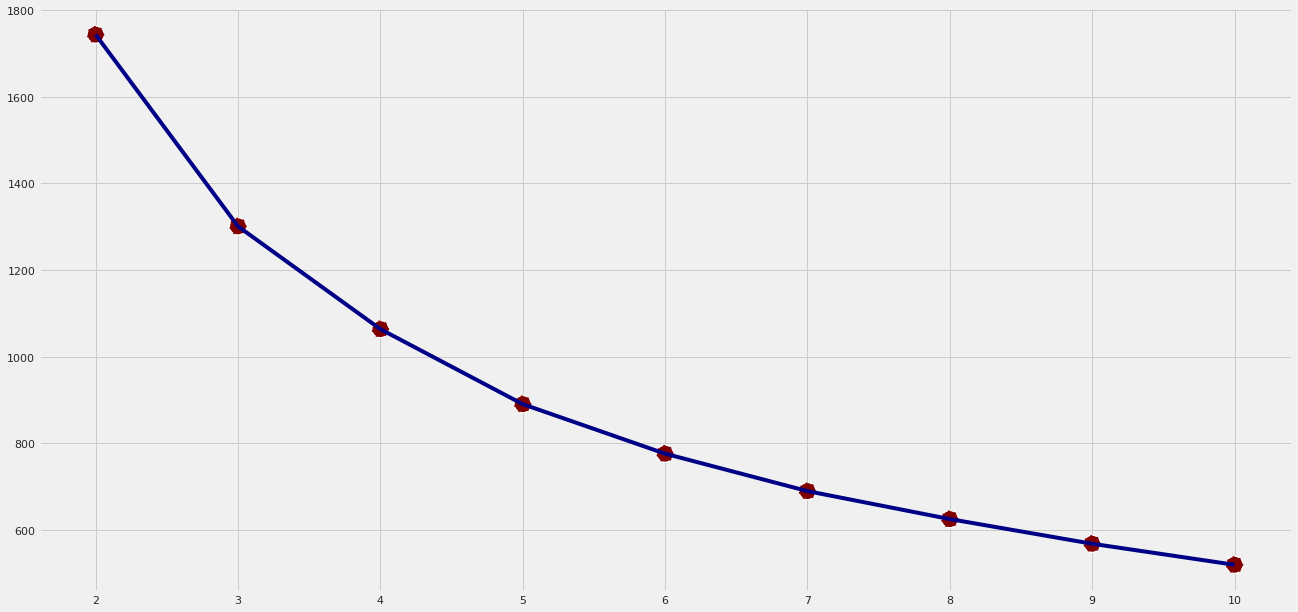

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=45)
    kmeans.fit(df_new.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--');


Pada visualisasi tersebut, jumlah cluster yang dipilih adalah sejumlah 4 cluster, karena pada cluster 4-5 memiliki selisih jarak yang sedikit. Selain itu, pada cluster selanjutnya juga memiliki selisih jarak yang kecil

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=45)
kmeans.fit(df_new.values)


KMeans(n_clusters=4, random_state=45)

In [ ]:
df_new

,Average_Tarif_PerKM,Lama_Membership,avg_discount
1028,0.117409,0.310547,0.591104
1104,0.131202,0.447591,0.580597
1216,0.107033,0.249674,0.562697
1256,0.227925,0.277018,0.955834
1280,0.064524,0.221354,0.563792
...,...,...,...
62981,0.000000,0.157878,0.000000
62982,0.000000,0.022786,0.000000
62983,0.000000,0.221680,0.000000
62985,0.000000,0.832682,0.000000


In [ ]:
df_new['cluster'] = kmeans.labels_
df_new.sample(5)


,Average_Tarif_PerKM,Lama_Membership,avg_discount,cluster
44625,0.137412,0.192383,0.526063,3
12151,0.122366,0.405599,0.437240,2
24872,0.104830,0.565755,0.413840,2
20428,0.143126,0.053060,0.482483,0
55642,0.137951,0.011719,0.534339,3


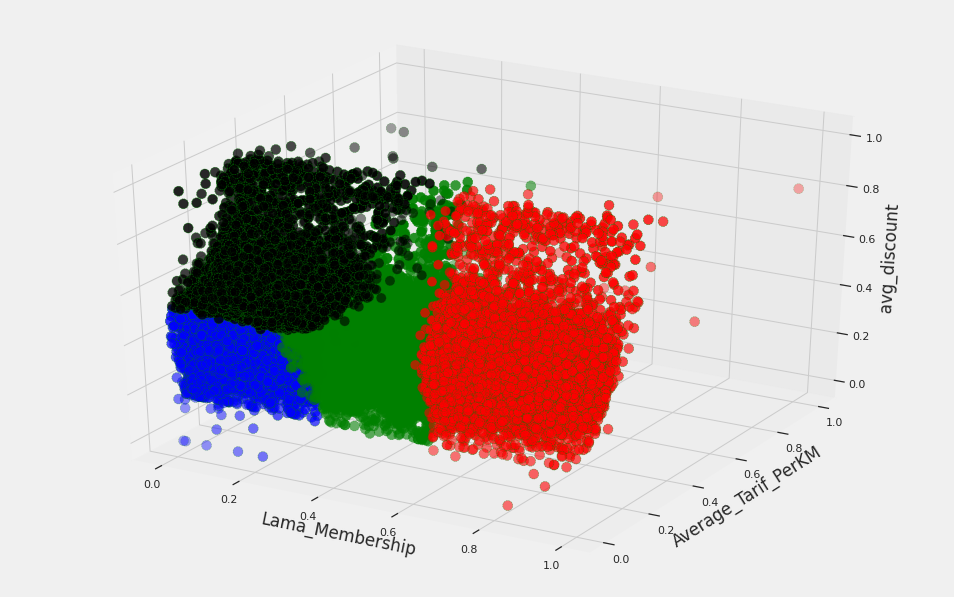

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new.Lama_Membership[df_new.cluster == 0], df_new["Average_Tarif_PerKM"][df_new.cluster == 0], df_new["avg_discount"][df_new.cluster == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.Lama_Membership[df_new.cluster == 1], df_new["Average_Tarif_PerKM"][df_new.cluster == 1], df_new["avg_discount"][df_new.cluster == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.Lama_Membership[df_new.cluster == 2], df_new["Average_Tarif_PerKM"][df_new.cluster == 2], df_new["avg_discount"][df_new.cluster == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.Lama_Membership[df_new.cluster == 3], df_new["Average_Tarif_PerKM"][df_new.cluster == 3], df_new["avg_discount"][df_new.cluster == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Lama_Membership")
plt.ylabel("Average_Tarif_PerKM")
ax.set_zlabel('avg_discount')
plt.show()

In [ ]:
display(df_new.groupby('cluster').agg(['mean','median']))

Average_Tarif_PerKM           Lama_Membership           avg_discount  \
                       mean    median            mean    median         mean   
cluster                                                                        
0                  0.096360  0.099451        0.119882  0.106445     0.391215   
1                  0.125557  0.122691        0.754857  0.740560     0.489359   
2                  0.120247  0.118897        0.440094  0.430990     0.468902   
3                  0.159209  0.149655        0.139678  0.128581     0.572421   

                   
           median  
cluster            
0        0.406010  
1        0.480038  
2        0.468240  
3        0.545905

1. Lama Membership paling tinggi adalah pada cluster 1. Sedangkan pada cluster 0 dan 3 adalah new membership
2. Average discount antara 3 memiliki average discount lebih tinggi dibanding cluster 0.
3. Average discount cluster 1 dan 2 kebanyakan rendah
4. Average Tarif PerKM paling tinggi cluster 3 sedangkan paling rendah adalah cluster 0 
5. Lama_membership paling tinggi adalah cluster 1 sedangkan paling rendah adalah cluster 0 
6. average_discount paling tinggi adalah cluster 3 sedangkan paling rendah pada cluster 0

## Rekomendasi Business

1. Karena jumlah membership lama yang memiliki average discount yang tinggi hanya sedikit, discount bisa diberikan kepada customer tersebut agar terus bertahan menjadi member 
2. Average_Tarif_PerKM pada cluster 3 paling tinggi sedangkan pada cluster 3 bukan merupakan golongan membership lama. Hal tersebut menandakan bahwa harga tidak mempengaruhi Membership 